<a href="https://colab.research.google.com/github/kvalaroutsos/cnn_funcs/blob/main/Basic_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the download file
zip_ref=zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2023-03-14 10:02:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   137MB/s    in 0.8s    

2023-03-14 10:02:56 (137 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
! ls pizza_steak/

test  train


In [ ]:
! ls pizza_steak/train/

pizza  steak


In [2]:
import os
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in{dirpath}.')


There are 2 directories and 0 images inpizza_steak.
There are 2 directories and 0 images inpizza_steak/test.
There are 0 directories and 250 images inpizza_steak/test/pizza.
There are 0 directories and 250 images inpizza_steak/test/steak.
There are 2 directories and 0 images inpizza_steak/train.
There are 0 directories and 750 images inpizza_steak/train/pizza.
There are 0 directories and 750 images inpizza_steak/train/steak.


In [ ]:
num_steak_images_train=len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

To visualise our images first get the class names progammatically

In [5]:
# Get the class names programatically
import pathlib
import numpy as np
data_dir=pathlib.Path('/content/pizza_steak/train')
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['pizza' 'steak']


In [ ]:
a=data_dir.glob('*')

In [ ]:
for item in a:
  print(item)

/content/pizza_steak/train/steak
/content/pizza_steak/train/pizza


In [ ]:
# Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up the target directory
  target_folder=target_dir+'/'+target_class
  # Get a random image path
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read in the image and plot it using matplotlib

  img=mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}') # Show the shape of the image

  return img


In [ ]:
os.listdir('/content/pizza_steak')

['test', 'train']

In [ ]:
! ls

drive  pizza_steak  pizza_steak.zip  sample_data


In [ ]:
! mkdir 'new_folder'

In [ ]:
! echo 'Hello World'

Hello World


['3042454.jpg']
Image shape: (512, 512, 3)


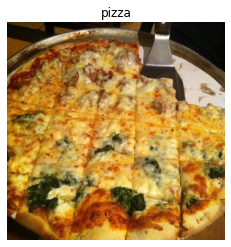

In [ ]:
# View random image from training data set
img = view_random_image(target_dir='pizza_steak/train',
                        target_class='pizza')

In [ ]:
#Return the img in a array form
img.shape

(384, 512, 3)

In [ ]:
img.dtype

dtype('uint8')


We will turn it in a tensor
```
# Αυτό έχει τη μορφή κώδικα
```



In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 15,   5,   6],
        [ 15,   5,   6],
        [ 15,   5,   6],
        ...,
        [  3,   4,   8],
        [  3,   4,   8],
        [  3,   4,   8]],

       [[ 18,   8,   9],
        [ 18,   8,   9],
        [ 17,   7,   8],
        ...,
        [  2,   3,   7],
        [  2,   3,   7],
        [  3,   4,   8]],

       [[ 16,   7,   8],
        [ 17,   8,   9],
        [ 17,   8,   9],
        ...,
        [  1,   2,   6],
        [  2,   3,   7],
        [  2,   3,   7]],

       ...,

       [[123,  72,  17],
        [127,  74,  20],
        [124,  71,  17],
        ...,
        [210, 161, 118],
        [212, 160, 121],
        [211, 159, 122]],

       [[130,  78,  20],
        [127,  75,  17],
        [122,  67,  10],
        ...,
        [209, 159, 110],
        [206, 155, 110],
        [206, 154, 114]],

       [[136,  84,  24],
        [132,  78,  18],
        [129,  75,  15],
        ...,
        [207, 155, 10

In [ ]:
# View the image shape
img.shape # returns width, heigh, color channels Red-Gr-Bl

(384, 512, 3)

In [ ]:
# We have to transform the normalized 0-1
img.max()

255

Lets build a convolution neural -network and find patterns

* Load images
* Preprocess the images
* Build a CNN to find Patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
from matplotlib.colors import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set te seed 

tf.random.set_seed(42)

#Preprocess data (get all the pixel values between 0 & 1, also called scaling/normalizing )
train_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen= ImageDataGenerator(rescale=1./255.)

# Set up paths to our data directories
train_dir= '/content/pizza_steak/train'
test_dir='/content/pizza_steak/test'

# Import data from directories and turn it into batches

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42
                                            )

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Build a CNN model (smae as tiny VGG on the CNN )
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
     tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')                              
])

In [ ]:
# Compile our CNN
model_1.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
 2/47 [>.............................] - ETA: 2:30 - loss: 0.6785 - accuracy: 0.4844

KeyboardInterrupt: ignored

In [ ]:
model_1.summary()

# Ι wull build a dense model 
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']

#Fit the model
history_2= model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model_1.save('/content/drive/MyDrive/Colab_Notebooks/TENSORFLOW/food_model.h5')

# Build a CNN model (smae as tiny VGG on the CNN )
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
     tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')                              
])

from tensorflow import keras
loaded_model = keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/TENSORFLOW/food_model.h5')

In [ ]:
from tensorflow import keras
loaded_model = keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/TENSORFLOW/food_model.h5')

['2042975.jpg']
Image shape: (512, 512, 3)
['604977.jpg']
Image shape: (287, 512, 3)


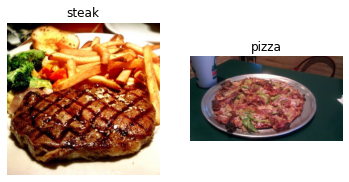

In [ ]:
# 1.Visualize Data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image('pizza_steak/train','steak')
plt.subplot(1,2,2)
pizza_img=view_random_image('pizza_steak/train','pizza')

In [ ]:
# 2. Preprocess the data (prepare it for a model)
train_dir='pizza_steak/train'
test_dir='pizza_steak/test'

In [ ]:
# A batch is a small subset of data. Rather than look all 10000 image at one, and look only in 32 at the time
# We will have memry problems. preper batch size is 32


In [ ]:
# Create train and test data generators and rescale the data.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)


In [ ]:
# Load our image data from directories and turn them into butches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode='binary',
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels= train_data.next()  # Get the next batch of images/labels in train data.
len(images), len(labels)

In [ ]:
labels

In [ ]:
len(train_data)

In [ ]:
# Get the first two images
images[:2], images[0].shape

Create a CNN moel (start with a base line)

A base line is a relatively simple model or an existing result when beginiing a machien learning experiment, i try to beat the baseeline

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
from keras.layers.attention.multi_head_attention import activation
# create the model this is tha bseline model, a layer convolutionnal layers
model_4= Sequential([
    Conv2D(filters=10,  # Filters are the number of sliding windows across an input (higher more complex model)
           kernel_size=3,  # the size of the sliding window going across the input
           strides=1,  # The size of the step the sliding window takes acreoss an input
           padding='valid',  
           activation='relu',
           input_shape=(224,224,3)),  # input layer specify input shape
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid')  # output layers specify aoutput shape
    
])

In [ ]:
# Compile the model 
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy']
                )

In [ ]:
model_4.summary()

In [ ]:
# Fit the model
history_4 =model_4.fit(
    train_data,
    epochs=5,
    validation_data=test_data
)

In [ ]:
# 5 Evaluate the model
model_4.evaluate(test_data)

In [ ]:
model_4.save('/content/drive/MyDrive/Colab_Notebooks/TENSORFLOW/food_model.h5')

In [ ]:
from tensorflow import keras
loaded_model = keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/TENSORFLOW/food_model.h5')

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize(10,7))

NameError: ignored

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):

  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs=range(len(history.history['loss']))

  #Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

    #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()



### 6 Adjust the model parameters

Fitting a machone learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting

* Increase the number of conv layers
* increase the number of conv filters
* Add another dense layer to the outout of our flattened layer

Reduce overfitting

* Add dta augmentation
* Add regularization layers (such as MAxPool2D)
* Add more data...

In [ ]:
# create the model (this is our new baseline)
model_5= Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])


In [ ]:
# Compile the model 
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy']
                )

In [ ]:
# Fit the model
history_5 =model_5.fit(
    train_data,
    epochs=5,
    validation_data=test_data
)

Epoch 1/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3879 - accuracy: 0.8307 - val_loss: 0.3435 - val_accuracy: 0.8460
Epoch 2/5
47/47 [==============================] - 10s 222ms/step - loss: 0.3801 - accuracy: 0.8333 - val_loss: 0.3339 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.3571 - accuracy: 0.8473 - val_loss: 0.3271 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 11s 238ms/step - loss: 0.3342 - accuracy: 0.8633 - val_loss: 0.3182 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 11s 225ms/step - loss: 0.3298 - accuracy: 0.8673 - val_loss: 0.3155 - val_accuracy: 0.8540


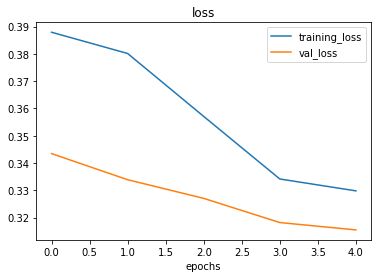

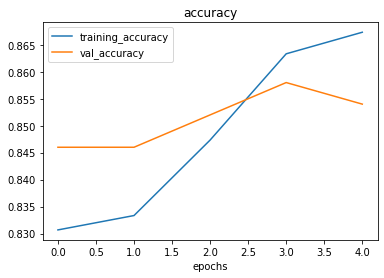

In [ ]:
plot_loss_curves(history_5)

In [ ]:
model_5.save('/content/drive/MyDrive/Colab_Notebooks/TENSORFLOW/food_model.h5')

We will use Data Augmentation

In [ ]:
#create ImageDataGenerator training instance with data augmentation
train_datagen_augmented= ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            #width_shift_range=0.2,
                                            #height_shift_range=0.2,
                                            horizontal_flip=True)

In [3]:
from tensorflow import keras
loaded_model = keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/TENSORFLOW/food_model.h5')

In [ ]:
# Create ImageDataGenerator without data augmentation without data augmentation
train_datagen=ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen= ImageDataGenerator(rescale=1/255.)

What is 
data augmentation?
A process of altering our training data to hve more diverity in the data. Letting them to learn more genralized patterns

In [ ]:
# import the data and augment them 
print('Augmneted training data')
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode='binary',
                                                                 shuffle=False) # For demonstration purpose only)
# Create non - augmentes train data batches
print('Non - augmentes train data batches')
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=False)


# Create non-augmented test data batches
print('Non augmented test data')
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='binary')


Augmneted training data
Found 1500 images belonging to 2 classes.
Non - augmentes train data batches
Found 1500 images belonging to 2 classes.
Non augmented test data
Found 500 images belonging to 2 classes.


Data aumnetation are used in training data





In [ ]:
# Ge some sample augmented
images, labels= train_data.next()
augmented_images, augmented_labels= train_data_augmented.next()


In [ ]:
images.shape

(32, 224, 224, 3)

showing image number: 10


(-0.5, 223.5, 223.5, -0.5)

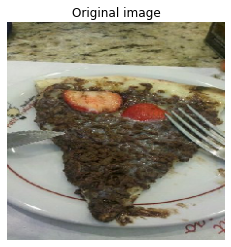

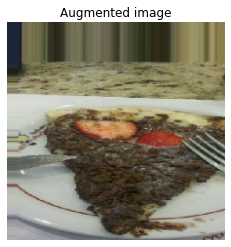

In [ ]:
# show the original image
import random
random_number=random.randint(0,32)  # our batch sizes are 32...
print(f'showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title(f'Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented image')
plt.axis(False)

In [ ]:
# create the model (this is our new baseline)
model_6= Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])


In [ ]:
# Compile the model 
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy']
                )

In [ ]:
# Fit the model
history_6 =model_6.fit(
    train_data_augmented,
    epochs=5,
    validation_data=test_data
)

Epoch 1/5
47/47 [==============================] - 26s 532ms/step - loss: 0.7092 - accuracy: 0.4867 - val_loss: 0.6813 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 25s 533ms/step - loss: 0.6937 - accuracy: 0.5227 - val_loss: 0.6726 - val_accuracy: 0.5040
Epoch 3/5
47/47 [==============================] - 26s 565ms/step - loss: 0.6892 - accuracy: 0.5920 - val_loss: 0.6508 - val_accuracy: 0.5840
Epoch 4/5
47/47 [==============================] - 25s 534ms/step - loss: 0.6592 - accuracy: 0.6180 - val_loss: 0.6650 - val_accuracy: 0.7020
Epoch 5/5
47/47 [==============================] - 24s 504ms/step - loss: 0.6449 - accuracy: 0.6800 - val_loss: 0.5758 - val_accuracy: 0.7760


Lets shuffle the data to see what it will happen

In [ ]:
# Import data and augment it ans shuffle from training directory
print('Augmneted training data')
train_data_augmented_shuffeld=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode='binary',
                                                                 shuffle=True) # For demonstration purpose only)
# Create non - augmentes train data batches
print('Non - augmentes train data batches')
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=True)


# Create non-augmented test data batches
print('Non augmented test data')
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='binary')

Augmneted training data
Found 1500 images belonging to 2 classes.
Non - augmentes train data batches
Found 1500 images belonging to 2 classes.
Non augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
model_7= Sequential([
    Conv2D(32,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model 
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy']
                )

In [ ]:
# Fit the model
history_7 =model_7.fit(
    train_data_augmented_shuffeld,
    epochs=5,
    validation_data=test_data
)

Epoch 1/5
47/47 [==============================] - 37s 529ms/step - loss: 0.5822 - accuracy: 0.6760 - val_loss: 0.4891 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 27s 570ms/step - loss: 0.4608 - accuracy: 0.7980 - val_loss: 0.3616 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 24s 514ms/step - loss: 0.4310 - accuracy: 0.8140 - val_loss: 0.3204 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 27s 578ms/step - loss: 0.4173 - accuracy: 0.8207 - val_loss: 0.4441 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 24s 505ms/step - loss: 0.4296 - accuracy: 0.8013 - val_loss: 0.3407 - val_accuracy: 0.8700


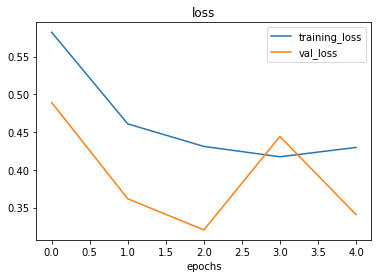

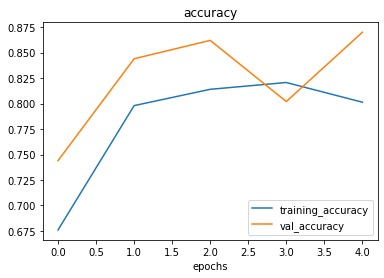

In [ ]:
plot_loss_curves(history_7)

In [ ]:
model_7.save('/content/drive/MyDrive/Colab_Notebooks/TENSORFLOW/food_model.h5')

7.  Repeat until satisfed
Since we have already beaten our baseline there are a few thing we could try to continue improve the model.
* Increase the number of model layers e.g. more Conv2D or MaxPool2D.
* Increase the number of filters in each conv layer eg from 10 to 32 or 64.
* Train for lonfer more epochs.
* Find an ideal learning rate (For Adam the defaults are very good).
* Find more data.
* Use transfer learning to leverage what another image model has learnt and adjust it to our model.


In [4]:
print(class_names)

NameError: ignored

In [ ]:
from tensorflow import keras
loaded_model = keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/TENSORFLOW/food_model.h5')

--2023-03-14 10:07:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2023-03-14 10:07:42 (46.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

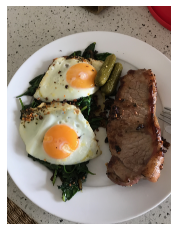

In [15]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak=mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)


In [8]:
import urllib.request
import os

url = "https://www.onmanorama.com/content/dam/mm/en/food/features/images/2021/10/17/pizza.jpg.transform/845x440/image.jpg" # Replace this with the URL of the image you want to download
filename = os.path.basename(url)

urllib.request.urlretrieve(url, filename)

('image.jpg', <http.client.HTTPMessage at 0x7fc4917e25e0>)

In [9]:
from PIL import Image

image = Image.open("image.jpg") # Replace this with the filename of the image you downloaded

# You can now use the image in your deep learning program

(-0.5, 844.5, 439.5, -0.5)

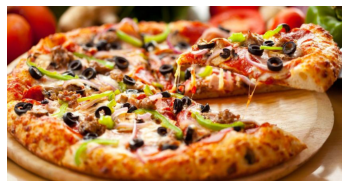

In [ ]:

pizza=mpimg.imread('image.jpg')
plt.imshow(pizza)
plt.axis(False)

In [ ]:
pizza.shape

(440, 845, 3)

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [7]:
import tensorflow as tf

When you want to make predictions on new deta the data have to by resized to the type that the model is shaped for

In [ ]:
expanded_steak=tf.expand_dims(steak,axis=0)

In [6]:
# Create a function that import the image and reshape it to thr proper forms
def load_and_prep_image(filename,img_shape=224):
  """
  Read the image from filename, turns it to atensor and reshape it to (img_shape, img_shape, color_channels)
  """
  img=tf.io.read_file(filename)
  # Decode the read file to a tensor
  img=tf.image.decode_image(img)
  # Resize the image
  img=tf.image.resize(img,size=[img_shape, img_shape])
  #Rescale the image betwwen 0-1
  img=img/255.
  return img


In [10]:
pizza=load_and_prep_image('image.jpg')


In [16]:
# Load in and preprocess our custom image
steak=load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [17]:
pred=loaded_model.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 82ms/step


In [11]:
pred=loaded_model.predict(tf.expand_dims(pizza, axis=0))

1/1 [==============================] - 1s 772ms/step


In [18]:
# We can index the predicted class by rounding the prediction probability
pred_class=class_names[int(tf.round(pred))]
pred_class

'steak'

In [21]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located as filename, makes a prediction with model, and
  plot the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img=load_and_prep_image(filename)

  # Make the prediction
  pred=model.predict(tf.expand_dims(img,axis=0))

  # Get the predicted class
  pred_class=class_names[int(tf.round(pred))]

  # Plot the image 
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)



1/1 [==============================] - 0s 75ms/step


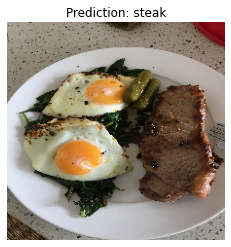

In [24]:
pred_and_plot(loaded_model, '03-steak.jpeg')

In [25]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2023-03-14 11:19:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2023-03-14 11:19:23 (44.6 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



1/1 [==============================] - 0s 152ms/step


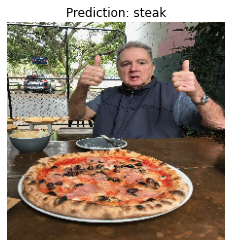

In [26]:
pred_and_plot(loaded_model,'03-pizza-dad.jpeg')